In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_contact_map(file_path, pdb_name, residue_num, temperature, save_path, text, index, cubes):
    plt.figure(figsize=(9, 7))
    data = np.zeros((residue_num, residue_num))
    for i in range(1, 4):
        for j in range(1, 201):
            f = open(file_path + pdb_name + "/" + temperature + "/" + str(i) + "/" + "0" * (5 - len(str(j))) + str(
                j) + ".dat")
#             print(file_path + pdb_name + "/" + temperature + "/" + str(i) + "/" + "0" * (5 - len(str(j))) + str(j) + ".dat")
            line = f.readline()
            line = f.readline()
            for n in range(residue_num):
                for m in range(residue_num):
                    line = f.readline()
                    value = float(line[11:19])
                    # print(value)
                    if value < 1.0:
                        data[n][m] += 1
                line = f.readline()
            f.close()

    data = data / 600
    contact = get_structure_contact(file_path + pdb_name + "/" + "00000.dat", residue_num)

    for i in range(residue_num):
        for j in range(i + 1, residue_num):
            if contact[i][j] != 1 or data[i][j] < 0.8:
                data[i][j] = 0

    plt.imshow(data, cmap=plt.cm.Reds, origin='lower', aspect='auto')
    clb = plt.colorbar()
    clb.ax.tick_params(labelsize=16)
    clb.set_label('Survival probabilities of contacts', fontsize=20, fontweight="bold")

    plt.xlim(0, residue_num - 1)
    plt.ylim(0, residue_num - 1)
    plt.xlabel("Residue index", fontsize=20, fontweight="bold")
    plt.ylabel("Residue index", fontsize=20, fontweight="bold")

    ticks_index = []
    for tick in index:
        ticks_index.append((tick[0] + tick[1]) / 2)
        # plt.plot([tick[0], tick[0]], [0, residue_num - 1], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([tick[1], tick[1]], [0, residue_num - 1], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([0, residue_num - 1], [tick[0], tick[0]], linestyle='--', linewidth=0.4, color="#3E3E3E")
        # plt.plot([0, residue_num - 1], [tick[1], tick[1]], linestyle='--', linewidth=0.4, color="#3E3E3E")

    # for cube in cubes:
    #     plt.plot([cube[0], cube[1]], [cube[3], cube[3]], linewidth=1, color="#3E3E3E")
    #     plt.plot([cube[0], cube[1]], [cube[2], cube[2]], linewidth=1, color="#3E3E3E")
    #     plt.plot([cube[0], cube[0]], [cube[2], cube[3]], linewidth=1, color="#3E3E3E")
    #     plt.plot([cube[1], cube[1]], [cube[2], cube[3]], linewidth=1, color="#3E3E3E")

    plt.xticks(ticks_index, text, fontsize=14, family='Times New Roman', fontweight="bold")
    plt.yticks(ticks_index, text, fontsize=14, family='Times New Roman', fontweight="bold")
    plt.savefig(save_path + pdb_name + "_" + temperature + ".png", format='png', dpi=600)
    plt.show()

def get_structure_contact(file_path, residue_num):
    contact = np.zeros((residue_num, residue_num))
    f = open(file_path)
    line = f.readline()
    line = f.readline()
    for i in range(residue_num):
        for j in range(residue_num):
            line = f.readline()
            value = float(line[11:19])
            if value < 1.0:
                contact[i][j] = 1
        line = f.readline()
    f.close()
    return contact

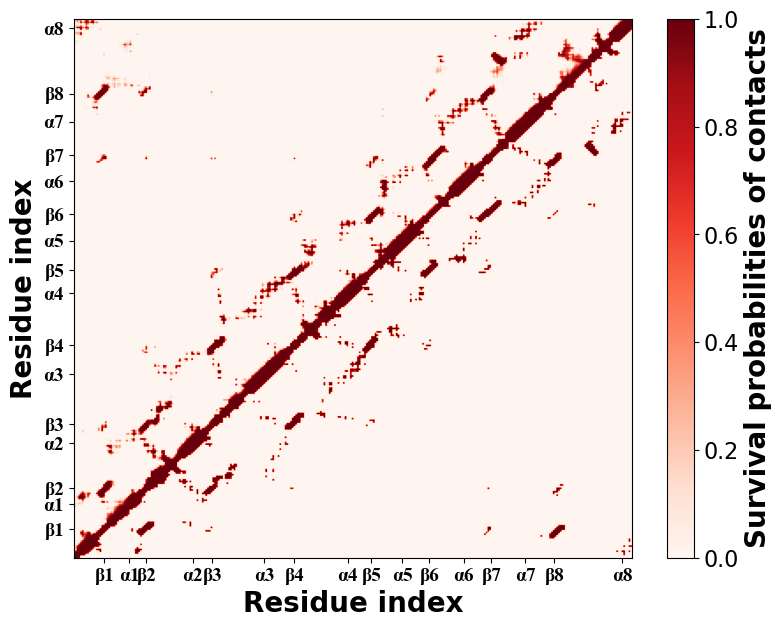

In [5]:
file_path = "C:/Users/17351/Downloads/contact_map/"
pdb_name = "M1"
residue_num = 318
temperature = "400k"
save_path = "C:/Users/17351/Desktop/protein_fram/G11/Figs/fig7/"
M1_index = [[14, 20], [26, 37], [39, 43], [61, 74], [76, 81], [99, 117], [121, 129],
                [149, 162], [166, 172], [179, 194], [200, 204], [215, 228], [231, 243],
                [247, 266], [270, 276], [306, 317]]
text = ["β1", "α1", "β2", "α2", "β3", "α3", "β4", "α4", "β5", "α5", "β6", "α6", "β7", "α7", "β8", "α8"]

TY1_index = [[12, 18], [28, 40], [42, 46], [59, 71], [75, 83], [100, 118], [122, 130], [144, 157], [161, 167],
                 [177, 193], [199, 203], [213, 225], [229, 238], [241, 258], [261, 267], [290, 301]]
ty1_cubes = [[42, 46, 12, 18], [75, 83, 42, 46], [122, 130, 75, 83], [161, 167, 122, 130], [199, 203, 161, 167],
                 [229, 238, 199, 203], [261, 267, 12, 18], [261, 267, 229, 238], [290, 301, 241, 258], [100, 118, 144, 157],
                 [144, 157, 177, 193], [75, 83, 161, 167]]
m1_cubes = [[39, 43, 14, 20], [76, 81, 39, 43], [121, 129, 76, 81], [149, 162, 99, 117], [166, 172, 121, 129],
                [200, 204, 166, 172], [231, 243, 200, 204], [270, 276, 14, 20], [270, 276, 231, 243], [306, 317, 247, 266],
                [215, 228, 247, 266], [247, 266, 306, 317]]
get_contact_map(file_path, pdb_name, residue_num, temperature, save_path, text, M1_index, m1_cubes)